In [ ]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import tensorflow_hub as hub

In [ ]:
# !unzip "drive/MyDrive/melanoma/melanoma.zip" -d "drive/MyDrive/melanoma"

In [ ]:
## lets modify the train files
malig=os.listdir('drive/MyDrive/melanoma/melanoma_cancer_dataset/train/malignant')
benign=os.listdir('drive/MyDrive/melanoma/melanoma_cancer_dataset/train/benign')
len(malig)+len(benign)

9605

In [ ]:
# lets create the img_collection_together for that lets use the function
def image_gather(df):
  img_collection_together=[]
  for i in range(0,len(df)):
    img_collection_together.append(f"/content/drive/MyDrive/melanoma/melanoma_cancer_dataset/train/{df['type'][i]}/{df['id'][i]}.jpg")

  return img_collection_together

In [ ]:
df=pd.read_csv('drive/MyDrive/melanoma/labels.csv')
df

,id,type
0,melanoma_3240,benign
1,melanoma_2758,benign
2,melanoma_730,benign
3,melanoma_4578,benign
4,melanoma_407,benign
...,...,...
9600,melanoma_1438,benign
9601,melanoma_1142,benign
9602,melanoma_4401,benign
9603,melanoma_1498,benign


In [ ]:
img_collection_together=image_gather(df)
img_collection_together

['/content/drive/MyDrive/melanoma/melanoma_cancer_dataset/train/benign/melanoma_3240.jpg',
 '/content/drive/MyDrive/melanoma/melanoma_cancer_dataset/train/benign/melanoma_2758.jpg',
 '/content/drive/MyDrive/melanoma/melanoma_cancer_dataset/train/benign/melanoma_730.jpg',
 '/content/drive/MyDrive/melanoma/melanoma_cancer_dataset/train/benign/melanoma_4578.jpg',
 '/content/drive/MyDrive/melanoma/melanoma_cancer_dataset/train/benign/melanoma_407.jpg',
 '/content/drive/MyDrive/melanoma/melanoma_cancer_dataset/train/benign/melanoma_2909.jpg',
 '/content/drive/MyDrive/melanoma/melanoma_cancer_dataset/train/malignant/melanoma_7158.jpg',
 '/content/drive/MyDrive/melanoma/melanoma_cancer_dataset/train/malignant/melanoma_6466.jpg',
 '/content/drive/MyDrive/melanoma/melanoma_cancer_dataset/train/benign/melanoma_2644.jpg',
 '/content/drive/MyDrive/melanoma/melanoma_cancer_dataset/train/benign/melanoma_1326.jpg',
 '/content/drive/MyDrive/melanoma/melanoma_cancer_dataset/train/malignant/melanoma_884

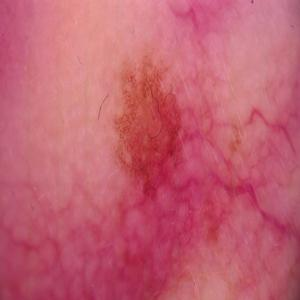

In [ ]:
# lets display the image
from IPython.display import Image
Image(img_collection_together[2])

In [ ]:
labels=df['type']
labels=np.array(labels)
labels

array(['benign', 'benign', 'benign', ..., 'benign', 'benign', 'benign'],
      dtype=object)

In [ ]:
unique_type=np.unique(labels)
unique_type


array(['benign', 'malignant'], dtype=object)

In [ ]:
boolean_array=[]
for data in labels:
  boolean_array.append(data==unique_type)

len(boolean_array)

9605

In [ ]:
# lets split the data
x=img_collection_together
y=boolean_array


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
NUM_IMAGES=1000 #@param{type:'slider',min:1000,max:10000,step:1000}

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,random_state=42)
len(x_train),len(y_train),len(x_val),len(y_val)

(800, 800, 200, 200)

In [ ]:
# to analyze an image
from matplotlib.pyplot import imread
img=imread(img_collection_together[2])
img.shape

(300, 300, 3)

In [ ]:
img

array([[[182,  77, 110],
        [182,  77, 110],
        [182,  77, 110],
        ...,
        [169, 100, 121],
        [165,  96, 117],
        [162,  93, 114]],

       [[181,  76, 109],
        [181,  76, 109],
        [182,  77, 110],
        ...,
        [169, 100, 121],
        [165,  96, 117],
        [162,  93, 114]],

       [[181,  76, 109],
        [181,  76, 109],
        [181,  76, 109],
        ...,
        [169, 100, 121],
        [165,  96, 117],
        [161,  92, 113]],

       ...,

       [[140,  52,  74],
        [142,  54,  76],
        [146,  57,  79],
        ...,
        [119,  56,  67],
        [115,  53,  64],
        [112,  50,  61]],

       [[140,  52,  74],
        [142,  54,  76],
        [144,  56,  78],
        ...,
        [117,  55,  66],
        [113,  51,  62],
        [111,  49,  60]],

       [[139,  51,  73],
        [141,  53,  75],
        [144,  56,  78],
        ...,
        [116,  54,  65],
        [112,  50,  61],
        [109,  47,  58]]

In [ ]:
## lets preprocess the image
# lets create a function for that
IMG_SIZE=224
def process_image(imgpath):
  # load the image
  image=tf.io.read_file(imgpath)
  #convert them into tensors with 3 color channels
  image=tf.image.decode_jpeg(image,channels=3)
  # change the given value of color code under 0-2
  image=tf.image.convert_image_dtype(image,tf.float32)
  #resize the image
  image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image


In [ ]:
process_image(x[42])

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.61905545, 0.5484672 , 0.6112123 ],
        [0.62228084, 0.5516926 , 0.6144377 ],
        [0.634839  , 0.56425077, 0.62586725],
        ...,
        [0.4826329 , 0.41596624, 0.45518193],
        [0.45284727, 0.3877797 , 0.4269954 ],
        [0.42619058, 0.3633326 , 0.4025483 ]],

       [[0.62034315, 0.5497549 , 0.6085084 ],
        [0.6306026 , 0.56001437, 0.61876786],
        [0.6490318 , 0.5784436 , 0.63393015],
        ...,
        [0.48506105, 0.41331586, 0.45422438],
        [0.4561618 , 0.38949513, 0.42871082],
        [0.4338352 , 0.3687676 , 0.4079833 ]],

       [[0.6380643 , 0.5674761 , 0.62124944],
        [0.6520659 , 0.58147764, 0.63311267],
        [0.6702528 , 0.59966457, 0.6489237 ],
        ...,
        [0.5015349 , 0.42337456, 0.46642146],
        [0.47922423, 0.4025786 , 0.4451206 ],
        [0.45840752, 0.39004794, 0.42982793]],

       ...,

       [[0.6335083 , 0.5354691 , 0.61782205],
        [0.63

In [ ]:
# we should know that for creating data batches for preprocessing it should be in the form of tuples i.e. image,label
def get_image_label(imgpath,label):
  image=process_image(imgpath)
  return image,label

In [ ]:
# Now we have to create a function for data batches
BATCH_SIZE=32
def create_data_batch(x,y=None,test_data=False,valid_data=False,batchsize=BATCH_SIZE):
  if test_data:
    print('creating test batches.......')
    #slicing
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x)))
    #batchify them
    data_batch=data.map(process_image).batch(batchsize)
    return data_batch
  elif valid_data:
    print('creating valid data batches.....')
    #slicing
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    data_batch=data.map(get_image_label).batch(batchsize)
    return data_batch
  else:
    print('creating training data batches......')
    #slicing
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    #shuffling the data
    data=data.shuffle(buffer_size=len(x))
    data=data.map(get_image_label)
    data_batch=data.batch(batchsize)
    return data_batch




In [ ]:
# Now lets batch both the train and valid sets
train_data=create_data_batch(x_train,y_train)
valid_data=create_data_batch(x_val,y_val,valid_data=True)

creating training data batches......
creating valid data batches.....


In [ ]:
len(train_data)

25

In [ ]:
25*32

800

In [ ]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.bool, name=None))>

In [ ]:
# now to check the values present inside the batch set lets iterate them
train_images,train_labels=next(train_data.as_numpy_iterator())
train_images

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
## now lets vizualise the images
def show_25_images(images,labels):
  plt.figure(figsize=(10,10))
  #lets create the plot
  for i in range(25):
    ax=plt.subplot(5,5,i+1)
    #display the image
    plt.imshow(images[i])
    #display the corresponding title
    plt.title(unique_type[labels[i].argmax()])
    #set the axis of
    plt.axis('off')


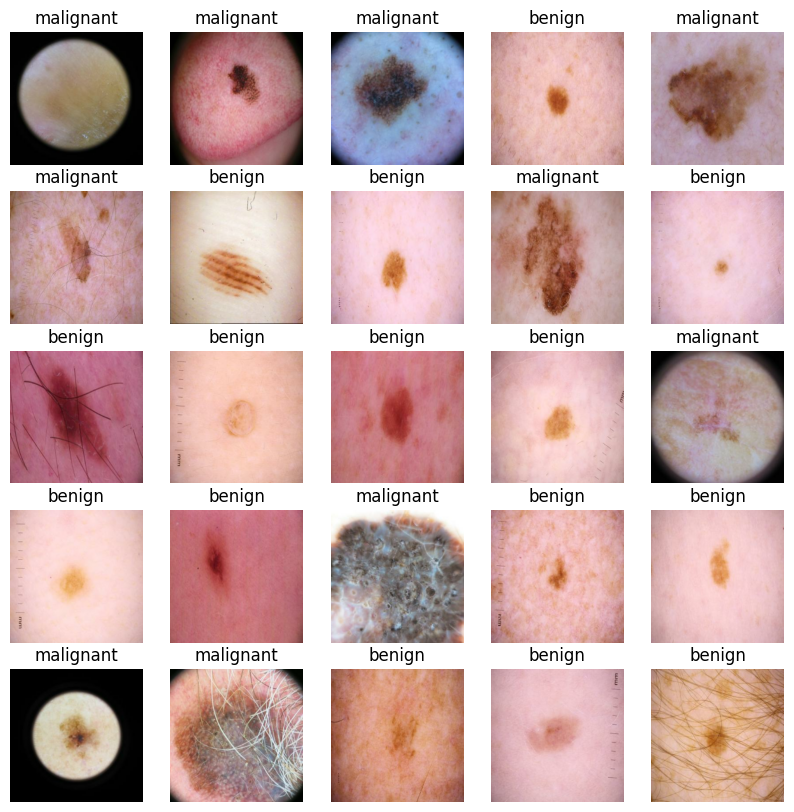

In [ ]:
show_25_images(train_images,train_labels)

In [ ]:
## lets start creating a model as we use CNN
## for that we need to have three things 1. Input shape 2. Output shape 3. model url
INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3]
OUTPUT_SHAPE=len(unique_type)
MODEL_URL='https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5'

In [ ]:
 ## lets create a model
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model=MODEL_URL):

  print('Building model with: ',MODEL_URL)
  ## SET THE model layers
  model=tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), #Layer1 (input layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation='softmax') #Layer2 (output layer)


  ])

  #Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['accuracy']

  )
  # Build the model
  model.build(INPUT_SHAPE)
  return model

In [ ]:
model=create_model()
model.summary()

Building model with:  https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              25615849  
                                                                 
 dense (Dense)               (None, 2)                 2004      
                                                                 
Total params: 25,617,853
Trainable params: 2,004
Non-trainable params: 25,615,849
_________________________________________________________________


In [ ]:
## load the tensorboard exxtension
%load_ext tensorboard

In [ ]:
import datetime
## lets start creating the tensorboard callbacks
def create_tensorboard_callback():
  logdir=os.path.join('drive/MyDrive/melanoma/logs',datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  return tf.keras.callbacks.TensorBoard(logdir)


In [ ]:
## lets create early stopping model
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3)

In [ ]:
# lets create num of epoches section
NUM_EPOCHES=100 #@param{type:'slider',min:10,max:100,step:10}

In [ ]:
## lets train the model
#for that lets create a function
def train_model():
  model=create_model()
  tensorboard=create_tensorboard_callback()
  model.fit(x=train_data,
            epochs=NUM_EPOCHES,
            validation_data=valid_data,
            validation_freq=1,
            callbacks=[tensorboard,early_stopping]
            )
  return model

In [ ]:
model=train_model()

Building model with:  https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5
Epoch 1/100
25/25 [==============================] - 184s 6s/step - loss: 0.6099 - accuracy: 0.7275 - val_loss: 0.3518 - val_accuracy: 0.8400
Epoch 2/100
25/25 [==============================] - 3s 113ms/step - loss: 0.3831 - accuracy: 0.8512 - val_loss: 0.2777 - val_accuracy: 0.8800
Epoch 3/100
25/25 [==============================] - 4s 142ms/step - loss: 0.3161 - accuracy: 0.8700 - val_loss: 0.2982 - val_accuracy: 0.8700
Epoch 4/100
25/25 [==============================] - 3s 112ms/step - loss: 0.3444 - accuracy: 0.8587 - val_loss: 0.2532 - val_accuracy: 0.9050
Epoch 5/100
25/25 [==============================] - 3s 114ms/step - loss: 0.2964 - accuracy: 0.8813 - val_loss: 0.2222 - val_accuracy: 0.8900
Epoch 6/100
25/25 [==============================] - 4s 162ms/step - loss: 0.2728 - accuracy: 0.8813 - val_loss: 0.2453 - val_accuracy: 0.8950
Epoch 7/100
25/25 [==============================] - 3s 1

In [ ]:
#Now the next thing is to predict our validation data
predictions=model.predict(valid_data,verbose=1)
predictions

7/7 [==============================] - 3s 169ms/step


array([[2.7867836e-01, 7.2132164e-01],
       [9.9549872e-01, 4.5012380e-03],
       [3.8087793e-04, 9.9961913e-01],
       [9.9705184e-01, 2.9481831e-03],
       [9.8406374e-01, 1.5936291e-02],
       [9.7625935e-01, 2.3740683e-02],
       [4.7268680e-01, 5.2731317e-01],
       [9.9287391e-01, 7.1260422e-03],
       [8.2330062e-04, 9.9917668e-01],
       [9.5498693e-01, 4.5013104e-02],
       [5.1166975e-01, 4.8833022e-01],
       [9.3722614e-03, 9.9062777e-01],
       [9.5657372e-01, 4.3426313e-02],
       [9.7391214e-03, 9.9026090e-01],
       [1.7209967e-03, 9.9827898e-01],
       [9.3422437e-01, 6.5775655e-02],
       [9.6016759e-01, 3.9832402e-02],
       [1.7184272e-01, 8.2815731e-01],
       [7.9446867e-02, 9.2055315e-01],
       [1.2098376e-01, 8.7901628e-01],
       [3.7339941e-02, 9.6266001e-01],
       [6.4315144e-03, 9.9356842e-01],
       [1.5948344e-03, 9.9840516e-01],
       [4.5945406e-01, 5.4054594e-01],
       [4.3732297e-01, 5.6267709e-01],
       [4.0942276e-01, 5.

In [ ]:
print(predictions[0])
print(unique_type[np.argmax(predictions[0])])

[0.27867836 0.72132164]
malignant


In [ ]:
#lets create a function for labels
def get_pred_label(predictions):
  return unique_type[np.argmax(predictions)]


In [ ]:
get_pred_label(predictions[2])

'malignant'

In [ ]:
#now lets unbatchify our validation data
len(valid_data)

7

In [ ]:
def unbatchify(databatch):
  images_=[]
  labels_=[]
  for images,labels in databatch.unbatch().as_numpy_iterator():
    images_.append(images)
    labels_.append(labels)
  return images_,labels_

In [ ]:
valid_image,valid_label=unbatchify(valid_data)
valid_image[2]

array([[[0.02811625, 0.05164566, 0.04380252],
        [0.03137255, 0.05490196, 0.04705883],
        [0.03193684, 0.05433768, 0.04705883],
        ...,
        [0.13350618, 0.12958461, 0.14919244],
        [0.17041484, 0.16649327, 0.18610111],
        [0.19037142, 0.18644986, 0.2060577 ]],

       [[0.02811625, 0.05164566, 0.04380252],
        [0.03238827, 0.05388625, 0.04705883],
        [0.03500181, 0.0512727 , 0.04705883],
        ...,
        [0.19766779, 0.19374622, 0.21335408],
        [0.18161878, 0.17769721, 0.19730505],
        [0.1423327 , 0.13841113, 0.15801898]],

       [[0.02811625, 0.05164566, 0.04380252],
        [0.03336835, 0.05290617, 0.04705883],
        [0.03529412, 0.0509804 , 0.04705883],
        ...,
        [0.1720826 , 0.16816103, 0.18776888],
        [0.16585794, 0.16193637, 0.18154421],
        [0.1332822 , 0.12936063, 0.14896847]],

       ...,

       [[0.35060185, 0.40550384, 0.50746465],
        [0.39303717, 0.4519307 , 0.55189574],
        [0.44334942, 0

In [ ]:
#lets visualize them
def visualize_model(predictions,images,labels,n=12):
  pred_prob,image,label=predictions[n],images[n],labels[n]

  #set the tick off for both the scales
  plt.xticks([])
  plt.yticks([])
  #lets display the image
  plt.imshow(image)
  #set the title
  plt.title('{} {:0.2f}% {}'.format(get_pred_label(pred_prob),np.max(pred_prob)*100,get_pred_label(np.argmax(label))))

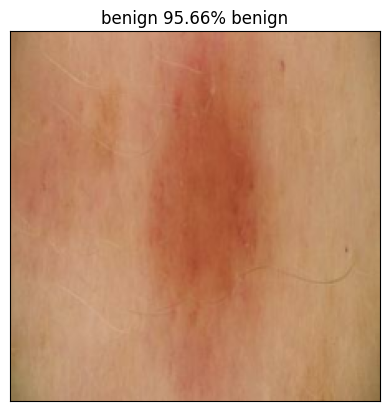

In [ ]:
visualize_model(predictions,valid_image,valid_label,n=12)

In [ ]:
def save_model(model, suffix=None):

  # create a model directory path name and save the model
  modeldir=os.path.join("drive/MyDrive/melanoma/models",datetime.datetime.now().strftime('%Y%m%d-%H%M%s'))
  modelpath=modeldir+'-'+suffix+'.h5'
  print(f'saving model to {modelpath}.....')
  model.save(modelpath)
  return modelpath

In [ ]:
def load_model(modelpath):
  print(f'loading the model from {modelpath}....')
  model= tf.keras.models.load_model(modelpath,
                                    custom_objects={'KerasLayer':hub.KerasLayer})
  return model

In [ ]:
#now lets train the entire dataset without splitting it into train and valid set
len(x),len(y)

(9605, 9605)

In [ ]:
#convert them into data batch
full_data=create_data_batch(x,y)

creating training data batches......


In [ ]:
len(full_data)

301

In [ ]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.bool, name=None))>

In [ ]:
#create a model
full_model=create_model()

Building model with:  https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5


In [ ]:
# create callbacks for fitting into the model
full_tensorboard_callback=create_tensorboard_callback()
full_early_stopping=tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=3)

In [ ]:
#now fit the model
full_model.fit(x=full_data,
               epochs=NUM_EPOCHES,
               callbacks=[full_tensorboard_callback,full_early_stopping])

Epoch 1/100
301/301 [==============================] - 1595s 5s/step - loss: 0.3382 - accuracy: 0.8632
Epoch 2/100
301/301 [==============================] - 31s 103ms/step - loss: 0.2611 - accuracy: 0.8980
Epoch 3/100
301/301 [==============================] - 29s 97ms/step - loss: 0.2384 - accuracy: 0.9070
Epoch 4/100
301/301 [==============================] - 29s 98ms/step - loss: 0.2319 - accuracy: 0.9089
Epoch 5/100
301/301 [==============================] - 30s 99ms/step - loss: 0.2268 - accuracy: 0.9124
Epoch 6/100
301/301 [==============================] - 30s 98ms/step - loss: 0.2296 - accuracy: 0.9124
Epoch 7/100
301/301 [==============================] - 30s 98ms/step - loss: 0.2172 - accuracy: 0.9167
Epoch 8/100
301/301 [==============================] - 31s 102ms/step - loss: 0.2267 - accuracy: 0.9107
Epoch 9/100
301/301 [==============================] - 30s 99ms/step - loss: 0.2160 - accuracy: 0.9183
Epoch 10/100
301/301 [==============================] - 30s 98ms/step -

In [ ]:
#now lets save the model
save_model(full_model,suffix='full-image-restnetv2-Adam')

saving model to drive/MyDrive/melanoma/models/20230829-05481693288080-full-image-restnetv2-Adam.h5.....


'drive/MyDrive/melanoma/models/20230829-05481693288080-full-image-restnetv2-Adam.h5'

In [ ]:
def load_model(modelpath):
  print(f'loading the model from {modelpath}....')
  model= tf.keras.models.load_model(modelpath,
                                    custom_objects={'KerasLayer':hub.KerasLayer})
  return model

In [ ]:
#now lets check our test data in the folder
testdir=os.listdir('drive/MyDrive/melanoma/melanoma_cancer_dataset/test/benign')
maligdir=os.listdir('drive/MyDrive/melanoma/melanoma_cancer_dataset/test/malignant')
len(testdir)+len(maligdir)

1000

In [ ]:
img_format=[]
for data in testdir:
  p=[data,'benign']
  img_format.append(p)
for data in maligdir:
  p=[data,'malignant']
  img_format.append(p)

np.random.shuffle(img_format)
img_format

[['melanoma_9853.jpg', 'benign'],
 ['melanoma_9913.jpg', 'benign'],
 ['melanoma_9894.jpg', 'benign'],
 ['melanoma_10145.jpg', 'malignant'],
 ['melanoma_9738.jpg', 'benign'],
 ['melanoma_9829.jpg', 'benign'],
 ['melanoma_10372.jpg', 'malignant'],
 ['melanoma_10461.jpg', 'malignant'],
 ['melanoma_9867.jpg', 'benign'],
 ['melanoma_10023.jpg', 'benign'],
 ['melanoma_10378.jpg', 'malignant'],
 ['melanoma_10343.jpg', 'malignant'],
 ['melanoma_9965.jpg', 'benign'],
 ['melanoma_9721.jpg', 'benign'],
 ['melanoma_9896.jpg', 'benign'],
 ['melanoma_10604.jpg', 'malignant'],
 ['melanoma_10152.jpg', 'malignant'],
 ['melanoma_9746.jpg', 'benign'],
 ['melanoma_10369.jpg', 'malignant'],
 ['melanoma_10146.jpg', 'malignant'],
 ['melanoma_9617.jpg', 'benign'],
 ['melanoma_9664.jpg', 'benign'],
 ['melanoma_9685.jpg', 'benign'],
 ['melanoma_10482.jpg', 'malignant'],
 ['melanoma_9652.jpg', 'benign'],
 ['melanoma_9727.jpg', 'benign'],
 ['melanoma_10364.jpg', 'malignant'],
 ['melanoma_10008.jpg', 'benign'],
 [

In [ ]:
img_test_together=[]
for data in img_format:
  img_test_together.append(f'/content/drive/MyDrive/melanoma/melanoma_cancer_dataset/test/{data[1]}/{data[0]}')
img_test_together


['/content/drive/MyDrive/melanoma/melanoma_cancer_dataset/test/benign/melanoma_9853.jpg',
 '/content/drive/MyDrive/melanoma/melanoma_cancer_dataset/test/benign/melanoma_9913.jpg',
 '/content/drive/MyDrive/melanoma/melanoma_cancer_dataset/test/benign/melanoma_9894.jpg',
 '/content/drive/MyDrive/melanoma/melanoma_cancer_dataset/test/malignant/melanoma_10145.jpg',
 '/content/drive/MyDrive/melanoma/melanoma_cancer_dataset/test/benign/melanoma_9738.jpg',
 '/content/drive/MyDrive/melanoma/melanoma_cancer_dataset/test/benign/melanoma_9829.jpg',
 '/content/drive/MyDrive/melanoma/melanoma_cancer_dataset/test/malignant/melanoma_10372.jpg',
 '/content/drive/MyDrive/melanoma/melanoma_cancer_dataset/test/malignant/melanoma_10461.jpg',
 '/content/drive/MyDrive/melanoma/melanoma_cancer_dataset/test/benign/melanoma_9867.jpg',
 '/content/drive/MyDrive/melanoma/melanoma_cancer_dataset/test/benign/melanoma_10023.jpg',
 '/content/drive/MyDrive/melanoma/melanoma_cancer_dataset/test/malignant/melanoma_10378

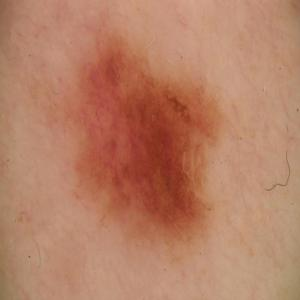

In [ ]:
from IPython.display import Image
Image(img_test_together[2])

In [ ]:
loaded_model=load_model('/content/drive/MyDrive/melanoma/models/20230829-05481693288080-full-image-restnetv2-Adam.h5')

loading the model from /content/drive/MyDrive/melanoma/models/20230829-05481693288080-full-image-restnetv2-Adam.h5....


In [ ]:
x=img_test_together

In [ ]:
#create data batch for that
test_data=create_data_batch(x,test_data=True)

creating test batches.......


In [ ]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
test_predictions=loaded_model.predict(test_data,verbose=1)

32/32 [==============================] - 93s 3s/step


In [ ]:
test_predictions[0]

array([0.9871525 , 0.01284742], dtype=float32)

In [ ]:
labels=df['type']
unique_type=np.unique(labels)
unique_type[np.argmax(test_predictions[0])]

'benign'

In [ ]:
#now lets add them to csv file
len(test_predictions)

1000

In [ ]:
img_df=[]
for i in range (0,len(test_predictions)):
  pic=[str(img_format[i][0])[:-4],unique_type[np.argmax(test_predictions[i])]]
  img_df.append(pic)

img_df



[['melanoma_9853', 'benign'],
 ['melanoma_9913', 'malignant'],
 ['melanoma_9894', 'benign'],
 ['melanoma_10145', 'malignant'],
 ['melanoma_9738', 'benign'],
 ['melanoma_9829', 'malignant'],
 ['melanoma_10372', 'malignant'],
 ['melanoma_10461', 'malignant'],
 ['melanoma_9867', 'malignant'],
 ['melanoma_10023', 'benign'],
 ['melanoma_10378', 'malignant'],
 ['melanoma_10343', 'malignant'],
 ['melanoma_9965', 'benign'],
 ['melanoma_9721', 'benign'],
 ['melanoma_9896', 'benign'],
 ['melanoma_10604', 'benign'],
 ['melanoma_10152', 'benign'],
 ['melanoma_9746', 'benign'],
 ['melanoma_10369', 'malignant'],
 ['melanoma_10146', 'benign'],
 ['melanoma_9617', 'benign'],
 ['melanoma_9664', 'benign'],
 ['melanoma_9685', 'benign'],
 ['melanoma_10482', 'malignant'],
 ['melanoma_9652', 'benign'],
 ['melanoma_9727', 'benign'],
 ['melanoma_10364', 'malignant'],
 ['melanoma_10008', 'malignant'],
 ['melanoma_9676', 'benign'],
 ['melanoma_9667', 'benign'],
 ['melanoma_10339', 'malignant'],
 ['melanoma_10582

In [ ]:
df=pd.DataFrame(img_df,columns=['id','type'])

In [ ]:
df

,id,type
0,melanoma_9853,benign
1,melanoma_9913,malignant
2,melanoma_9894,benign
3,melanoma_10145,malignant
4,melanoma_9738,benign
...,...,...
995,melanoma_9814,benign
996,melanoma_10265,malignant
997,melanoma_9796,benign
998,melanoma_9649,benign


In [ ]:
#save this predicted csv
df.to_csv('drive/MyDrive/melanoma/predicted_labels.csv',index= False)

In [ ]:
#now lets check the accuracy of the model
import os


In [ ]:
ben=os.listdir('/content/drive/MyDrive/melanoma/melanoma_cancer_dataset/test/benign')
mal=os.listdir('/content/drive/MyDrive/melanoma/melanoma_cancer_dataset/test/malignant')


In [ ]:
predicted_df=pd.read_csv('drive/MyDrive/melanoma/predicted_labels.csv')
predicted_df

,id,type
0,melanoma_9853,benign
1,melanoma_9913,malignant
2,melanoma_9894,benign
3,melanoma_10145,malignant
4,melanoma_9738,benign
...,...,...
995,melanoma_9814,benign
996,melanoma_10265,malignant
997,melanoma_9796,benign
998,melanoma_9649,benign


In [ ]:
data_aux=[]
for i in range(0,len(predicted_df)):
  if(ben.__contains__(f"{predicted_df['id'][i]}.jpg")):
    data_aux.append('benign')
  elif(mal.__contains__(f"{predicted_df['id'][i]}.jpg")):
    data_aux.append('malignant')
data_aux

['benign',
 'benign',
 'benign',
 'malignant',
 'benign',
 'benign',
 'malignant',
 'malignant',
 'benign',
 'benign',
 'malignant',
 'malignant',
 'benign',
 'benign',
 'benign',
 'malignant',
 'malignant',
 'benign',
 'malignant',
 'malignant',
 'benign',
 'benign',
 'benign',
 'malignant',
 'benign',
 'benign',
 'malignant',
 'benign',
 'benign',
 'benign',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'benign',
 'benign',
 'benign',
 'malignant',
 'benign',
 'benign',
 'malignant',
 'benign',
 'malignant',
 'malignant',
 'benign',
 'benign',
 'malignant',
 'malignant',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'malignant',
 'malignant',
 'malignant',
 'benign',
 'malignant',
 'benign',
 'benign',
 'malignant',
 'malignant',
 'benign',
 'benign',
 'malignant',
 'malignant',
 'malignant',
 'benign',
 'malignant',
 'benign',
 'malignant',
 'benign',
 'malignant',
 'benign',
 'malignant',
 'benign',
 'benign',
 'malignant',
 'benign',
 'malignant',
 

In [ ]:
names=predicted_df['type'].values

In [ ]:
arr=[]
for det in names:
  arr.append(det==np.unique(names))
arr


[array([ True, False]),
 array([False,  True]),
 array([ True, False]),
 array([False,  True]),
 array([ True, False]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([ True, False]),
 array([False,  True]),
 array([False,  True]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([False,  True]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([False,  True]),
 array([ True, False]),
 array([ True, False]),
 array([False,  True]),
 array([False,  True]),
 array([ True, False]),
 array([ True, False]),
 array([False,  True]),
 array([ True, False]),
 array([False,  True]),
 array([False,  True]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([False,  True]),
 array([ True, F

In [ ]:
data_auxi=[]
for val in data_aux:
  data_auxi.append(val==np.unique(names))
data_auxi


[array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([False,  True]),
 array([ True, False]),
 array([ True, False]),
 array([False,  True]),
 array([False,  True]),
 array([ True, False]),
 array([ True, False]),
 array([False,  True]),
 array([False,  True]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([False,  True]),
 array([False,  True]),
 array([ True, False]),
 array([False,  True]),
 array([False,  True]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([False,  True]),
 array([ True, False]),
 array([ True, False]),
 array([False,  True]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([False,  True]),
 array([ True, False]),
 array([ True, False]),
 array([False,  True]),
 array([ True, F

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(arr,data_auxi)
print(f"we have obtaind {accuracy_score(arr,data_auxi)*100}% accuracy !!!")

we have obtaind 88.4% accuracy !!!
